# Teoría de la Información y la Codificación
## Tarea: Códigos EAN-13


# Autor: 

Rellene la siguiente información:

 - Estudiante (nombre y apellidos): Jorge Gangoso Klöck
 - DNI/NIE/Pasaporte: 49398653N
 - Grupo: 1
 - Curso académico: 2021-2022



__Yo, como estudiante de la asignatura, aseguro que la elaboración de estos ejercicios ha sido realizada de forma individual, sin incurrir en copias parciales o totales de código fuente o documentación, y acepto las repercusiones que conllevaría si esto no fuese así.__


# Respuestas a las cuestiones teóricas:
## Esquema de Transmisión
Fuente: Generador de números de serie.
> -Alfabeto de la fuente: {0,1,2,3,4,5,6,7,8,9}

> -Palabras de la fuente: Todas las combinaciones de 12 elementos del alfabeto posibles ($10^{12}$)

> -Codigo: Representación mediante una serie de bandas blancas y negras de los 12 números más un dígito de control 
    
Canal: Diseño impreso sobre una superficie física
> -Discreto: El código de barras se imprime en un instante y no es dependiente del tiempo.

> -Sin memoria: La superficie inscrita con el código de barras carece de memoria.

> -Con ruido: Es posible que en el proceso entre la impresión y la lectura se produzcan errores, es por eso que se añaden los sistemas de comprobación de errores y la causa de que en algunos casos la lectura no se realice o se realice incorrectamente.
    
Destino: Lector de códigos de barras

## Función de Codificación
La función de codificación consta de varios pasos:
1. Calculo del dígito de control: 

Se calcula como la suma de los dígitos impares multiplicada por 3 más los dígitos pares en módulo 10, resultado al cual se le hace el inverso respecto a 10 (10-a) excepto si es 10 que vale 0. Esta operación se puede realizar matemáticamente como [10-a mod 10]

2. Secuencia de B/G para los dígitos izquierdos:

Se genera una secuencia de representaciones que pueden ser de la codificación B o G para cada dígito izquierdo (los 6 primeros digitos del valor a codificar) en función del Dígito de Control. Una vez establecida la secuencia debemos codificar cada cifra de acuerdo a su representación en B o en G según corresponda.

3. Secuencia R para los dígitos derechos:

Las 6 cifras derechas son convertidas directamente mediante la codificación R a un patrón de unidades blancas y negras.

In [367]:
#imports

import numpy as np
import matplotlib.pyplot as plt


In [368]:
# Secuencia de dígitos a codificar
digitos= "480017165411"

In [369]:
zonaSilenciosa= 9 # Tamaño de la zona silenciosa en Unidades
totalUnidades= 95+2*zonaSilenciosa # Se deben reservar totalUnidades unidades para imprimir el código de barras
grosor= 2 # Ancho (en píxeles) de cada unidad

In [370]:
# Salida: código de barras (unidades) y dígito de control
def CalcularCodigoBarras(secuenciaDigitos):

    # Código de barras
    # Array de totalUnidades. 0= negro; 1= blanco
    codigo= np.ones( totalUnidades , dtype= np.uint8)

    # Codificaciones B/G/R
   
    B= np.uint8(
        [
            [1, 1, 1, 0, 0, 1, 0], # 0    
            [1, 1, 0, 0, 1, 1, 0], # 1
            [1, 1, 0, 1, 1, 0, 0], # 2
            [1, 0, 0, 0, 0, 1, 0], # 3
            [1, 0, 1, 1, 1, 0, 0], # 4
            [1, 0, 0, 1, 1, 1, 0], # 5
            [1, 0, 1, 0, 0, 0, 0], # 6
            [1, 0, 0, 0, 1, 0, 0], # 7
            [1, 0, 0, 1, 0, 0, 0], # 8
            [1, 1, 1, 0, 1, 0, 0] # 9
        ]    )
    R = np.uint8(1-B)
    G = np.uint8(np.flip(R, 1))

    # Codificaciones a usar según el dígito de control
    codificaciones= np.uint8( # 0= B; 1= G
        [
            [0, 0, 0, 0, 0, 0], # Dígito de control 0
            [0, 0, 1, 0, 1, 1], # Dígito de control 1
            [0, 0, 1, 1, 0, 1], # dígito de control 2
            [0, 0, 1, 1, 1, 0], # dígito de control 3
            [0, 1, 0, 0, 1, 1], # dígito de control 4
            [0, 1, 1, 0, 0, 1], # dígito de control 5
            [0, 1, 1, 1, 0, 0], # dígito de control 6
            [0, 1, 0, 1, 0, 1], # dígito de control 7
            [0, 1, 0, 1, 1, 0], # dígito de control 8
            [0, 1, 1, 0, 1, 0] # dígito de control 9
        ]
    )
    
    
    # Paso 1. Calcular dígito de control
    secuenciaDigitos = np.array(tuple(secuenciaDigitos)).astype(np.uint8)
    
    control = secuenciaDigitos[::2]*3+secuenciaDigitos[1::2] #Cogemos los impares *3 y los pares
    control = (10-sum(control)%10)%10 #Los sumamos todos y le hacemos el modulo 10, a eso le hacemos 10-x modulo 10
    #El segundo modulo es para permitir que sea 0 cuando el resultado de x vale 10

    # Paso 2. Escribir las unidades de las guías (S, E, M)
    codigo[[9,11,55,57,101,103]] = 0
    # Paso 3. Rellenar las unidades de LLLLLL
    inicio = 12 #Primera unidad en la que hay L
    fin = inicio + 7 #Separación entre una cifra L y la siguiente
    for i in range(6):
        if codificaciones[control][i] == 0: #Segun el código de control, para la cifra i:
            codigo[inicio:fin] = B[int(secuenciaDigitos[i])] #Usamos la codificacion B
        else:
            codigo[inicio:fin] = G[int(secuenciaDigitos[i])] #O la G
        inicio += 7#actualizamos para la siguiente L
        fin +=7
    # Paso 4. Rellenar las unidades de RRRRRR
    inicio = 59
    fin = inicio + 42
    codigo[inicio:fin] = R[secuenciaDigitos[6:12]].reshape(-1)#Reshape para convertirlo en un vector1D 

    # Devolvería el código y el dígito de control
    return codigo, control
    

In [371]:

# Imagen de salida
anchoIm= totalUnidades*grosor
altoIm= 100
imagenSalida= np.ones( (altoIm, anchoIm) , dtype=np.uint8)*255


# Calcular el resultado
resultado = CalcularCodigoBarras(digitos)

uds = resultado[0]
DigitoControl= resultado[1]

# Pintar código de barras
# Para pintar un rectángulo de la coordenada (x,y) (10, 9) a la (13,11): 
#
#Repeat para convertir las unidades a píxeles
#Multiply para convertir los 1(blanco lógico) en 255(blanco en escala de grises)
#Dibujamos solo en las filas entre las zonas silenciosas
imagenSalida[zonaSilenciosa:altoIm-zonaSilenciosa, 0:anchoIm] = np.multiply(np.repeat(uds,grosor), 255)
#Hacer hueco en blanco para los números
imagenSalida[-25:altoIm, 12*grosor:54*grosor] = 255
imagenSalida[-25:altoIm, 59*grosor:100*grosor] = 255

El dígito de control es:  8


Text(120, 90, '165411')

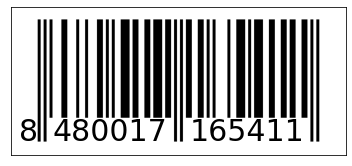

In [372]:

imgplot= plt.imshow(imagenSalida, cmap='gray')
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)





# Para pintar texto en alguna coordenada, con un tamaño de fuente especificado
plt.text(5, altoIm-10, DigitoControl, fontsize=30)
plt.text(28, altoIm-10, digitos[0:6], fontsize=30)
plt.text(120, altoIm-10, digitos[6:12], fontsize=30)